## Importujeme potrebné balíky

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2 
import seaborn as sns
sns.set()

## Import dát a čistenie dát

In [2]:
raw_csv_data = pd.read_csv("Index2022.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value']=df_comp.ftse # definovaná premenná

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8) # vytiahne prvých 80% záznamov
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:] # nastaví veľkosti vzoriek

In [5]:
import warnings # nezobrazuje chybové hlášky
warnings.filterwarnings("ignore")

##  LLR Test

In [6]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## ADF test market_value

In [7]:
sts.adfuller(df.market_value)

(-1.9041551418836873,
 0.330108932770283,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

## Vytvorenie výnosov - returns

In [8]:
df['returns'] = df.market_value.pct_change(1)*100
df = df.iloc[1:]

## ADF test returns

In [9]:
sts.adfuller(df.returns)

(-12.77026571949723,
 7.798058336038551e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.7672456975)

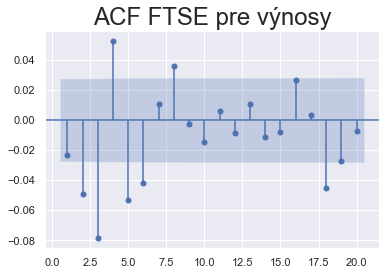

In [10]:
sgt.plot_acf(df.returns, lags=20, zero = False)
plt.title("ACF FTSE pre výnosy", size=24)
plt.show()

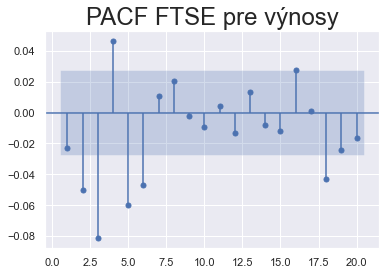

In [11]:
sgt.plot_pacf(df.returns, lags=20, zero = False)
plt.title("PACF FTSE pre výnosy", size=24)
plt.show()

## ARMA(1,0)

In [12]:
model_ret_ar_1_ma_0 = ARMA(df.returns, order=(1,0))
results_ret_ar_1_ma_0 = model_ret_ar_1_ma_0.fit()
results_ret_ar_1_ma_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Sun, 24 Apr 2022   AIC                          15865.497
Time:                        11:05:50   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4386           +0.0000j           43.4386            0.5000
-----------------------------------------------------------------------------
"""

## ARMA(7,0)

In [13]:
model_ret_ar_7_ma_0 = ARMA(df.returns, order=(7,0))
results_ret_ar_7_ma_0 = model_ret_ar_7_ma_0.fit()
results_ret_ar_7_ma_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood               -7886.647
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sun, 24 Apr 2022   AIC                          15791.294
Time:                        11:05:51   BIC                          15849.985
Sample:                    01-10-1994   HQIC                         15811.860
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.399      0.162      -0.008       0.045
ar.L1.returns    -0.0240      0.014     -1.702      0.089      -0.052       0.004
ar.L2.returns    -0.0517      0.014     -3.663      0.000      -0.079      -0.024
ar.L3.returns    -0.0874      0.014     -6.202      0.000      -0.115      -0.060
ar.L4.returns     0.0433      0.014      3.064      0.002       0.016       0.071
ar.L5.returns    -0.0601      0.014     -4.263      0.000      -0.088      -0.032
ar.L6.returns    -0.0463      0.014     -3.282      0.001      -0.074      -0.019
ar.L7.returns     0.0109      0.014      0.772      0.440      -0.017       0.039
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6490           -0.5384j            1.7347           -0.4498
AR.2           -1.6490           +0.5384j            1.7347            0.4498
AR.3           -0.1189           -1.4954j            1.5001           -0.2626
AR.4           -0.1189           +1.4954j            1.5001            0.2626
AR.5            1.2790           -0.9786j            1.6105           -0.1039
AR.6            1.2790           +0.9786j            1.6105            0.1039
AR.7            5.2269           -0.0000j            5.2269           -0.0000
-----------------------------------------------------------------------------
"""

In [14]:
model_ret_ar_6_ma_0 = ARMA(df.returns, order=(6,0))
results_ret_ar_6_ma_0 = model_ret_ar_6_ma_0.fit()
results_ret_ar_6_ma_0.summary()

print("\nLLR test p-value = " + str(LLR_test(model_ret_ar_6_ma_0 , model_ret_ar_7_ma_0  )))
#porovnanie ARMA(6,0) a ARMA(7,0) pričom p-value rozdielu je 0,44 , vysoko nad hladinou významnosti.


LLR test p-value = 0.44


In [15]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [58]:
df['wn'] = wn
df.describe() # White noise

,market_value,returns,wn
count,5020.000000,5020.000000,5020.000000
mean,5089.968287,0.018762,5096.648818
std,1016.947075,1.174752,1011.964781
min,2876.600000,-8.849274,1463.241422
25%,4275.360000,-0.543558,4409.230514
50%,5266.235000,0.005684,5074.154767
75%,5917.732500,0.607534,5764.884425
max,6930.200000,9.838771,8516.349938


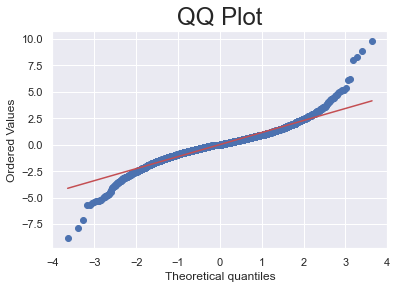

In [59]:
import scipy.stats
import pylab

scipy.stats.probplot(df.returns, plot = pylab)
plt.title("QQ Plot", size = 24)
pylab.show() #keby potrebujem QQ plot

## ARMA(0,1)

In [60]:
model_ret_ar_1_ma_0 = ARMA(df.returns, order=(0,1))
results_ret_ar_1_ma_0 = model_ret_ar_1_ma_0.fit()
results_ret_ar_1_ma_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.595
Method:                       css-mle   S.D. of innovations              1.174
Date:                Sat, 23 Apr 2022   AIC                          15865.190
Time:                        15:35:49   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.162      0.245      -0.013       0.050
ma.L1.returns    -0.0257      0.015     -1.720      0.085      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8549           +0.0000j           38.8549            0.0000
-----------------------------------------------------------------------------
"""

## ARMA(0,7)

In [61]:
model_ret_ar_0_ma_7 = ARMA(df.returns, order=(0,7))
results_ret_ar_0_ma_7 = model_ret_ar_0_ma_7.fit()
results_ret_ar_0_ma_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 7)   Log Likelihood               -7889.046
Method:                       css-mle   S.D. of innovations              1.165
Date:                Sat, 23 Apr 2022   AIC                          15796.091
Time:                        15:35:52   BIC                          15854.782
Sample:                    01-10-1994   HQIC                         15816.657
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.418      0.156      -0.007       0.045
ma.L1.returns    -0.0247      0.014     -1.739      0.082      -0.052       0.003
ma.L2.returns    -0.0488      0.014     -3.454      0.001      -0.077      -0.021
ma.L3.returns    -0.0821      0.014     -5.789      0.000      -0.110      -0.054
ma.L4.returns     0.0458      0.014      3.360      0.001       0.019       0.073
ma.L5.returns    -0.0486      0.014     -3.381      0.001      -0.077      -0.020
ma.L6.returns    -0.0390      0.014     -2.702      0.007      -0.067      -0.011
ma.L7.returns     0.0085      0.014      0.592      0.554      -0.020       0.037
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.9690           -1.1814j            1.5279           -0.3593
MA.2           -0.9690           +1.1814j            1.5279            0.3593
MA.3           -2.0397           -0.0000j            2.0397           -0.5000
MA.4            0.7516           -1.5246j            1.6998           -0.1771
MA.5            0.7516           +1.5246j            1.6998            0.1771
MA.6            1.5538           -0.0000j            1.5538           -0.0000
MA.7            5.5175           -0.0000j            5.5175           -0.0000
-----------------------------------------------------------------------------
"""

In [62]:
model_ret_ar_0_ma_6 = ARMA(df.returns, order=(0,6))
results_ret_ar_0_ma_6 = model_ret_ar_0_ma_6.fit()
results_ret_ar_0_ma_6.summary()

print("\nLLR test p-value = " + str(LLR_test(model_ret_ar_0_ma_6 , model_ret_ar_0_ma_7  )))
#porovnanie ARMA(0,6) a ARMA(0,7) pričom p-value rozdielu je 0,554 , vysoko nad hladinou významnosti.


LLR test p-value = 0.554


## ARMA(1,1)

In [63]:
model_ret_ar_1_ma_1 = ARMA(df.returns[1:], order=(1,1))
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
results_ret_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(1, 1)   Log Likelihood               -7915.406
Method:                       css-mle   S.D. of innovations              1.171
Date:                Sat, 23 Apr 2022   AIC                          15838.812
Time:                        15:35:56   BIC                          15864.896
Sample:                    01-11-1994   HQIC                         15847.952
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.448      0.148      -0.007       0.045
ar.L1.returns     0.7647      0.067     11.338      0.000       0.633       0.897
ma.L1.returns    -0.8139      0.061    -13.393      0.000      -0.933      -0.695
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3077           +0.0000j            1.3077            0.0000
MA.1            1.2286           +0.0000j            1.2286            0.0000
-----------------------------------------------------------------------------
"""

## ARMA model v porovnaní s AR(1) / MA(1)

In [64]:
model_ret_ar_1 = ARMA(df.returns[1:], order = (1,0))
model_ret_ma_1 = ARMA(df.returns[1:], order = (0,1))

In [65]:
print("\nARMA vs AR ", LLR_test(model_ret_ar_1, model_ret_ar_1_ma_1))
print("\nARMA vs MA ", LLR_test(model_ret_ma_1, model_ret_ar_1_ma_1))


ARMA vs AR  0.0

ARMA vs MA  0.0


## ARMA Model vyššieho rádu

In [30]:
model_ret_ar_3_ma_3 = ARMA(df.returns[1:], order=(3,3))
results_ret_ar_3_ma_3 = model_ret_ar_3_ma_3.fit()

In [31]:
LLR_test(model_ret_ar_1_ma_1, model_ret_ar_3_ma_3, DF = 4)

0.0

In [32]:
results_ret_ar_3_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(3, 3)   Log Likelihood               -7892.414
Method:                       css-mle   S.D. of innovations              1.166
Date:                Fri, 22 Apr 2022   AIC                          15800.828
Time:                        19:33:27   BIC                          15852.996
Sample:                    01-11-1994   HQIC                         15819.109
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.014      1.398      0.162      -0.008       0.046
ar.L1.returns    -0.1903      0.104     -1.828      0.068      -0.394       0.014
ar.L2.returns    -0.2944      0.087     -3.386      0.001      -0.465      -0.124
ar.L3.returns     0.4450      0.139      3.210      0.001       0.173       0.717
ma.L1.returns     0.1712      0.099      1.726      0.084      -0.023       0.366
ma.L2.returns     0.2279      0.084      2.698      0.007       0.062       0.393
ma.L3.returns    -0.5424      0.128     -4.253      0.000      -0.792      -0.292
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5170           -1.0286j            1.1512           -0.3241
AR.2           -0.5170           +1.0286j            1.1512            0.3241
AR.3            1.6955           -0.0000j            1.6955           -0.0000
MA.1           -0.5289           -0.9838j            1.1169           -0.3285
MA.2           -0.5289           +0.9838j            1.1169            0.3285
MA.3            1.4779           -0.0000j            1.4779           -0.0000
-----------------------------------------------------------------------------
"""

In [33]:
model_ret_ar_3_ma_2 = ARMA(df.returns[1:], order=(3,2))
results_ret_ar_3_ma_2 = model_ret_ar_3_ma_2.fit()
results_ret_ar_3_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(3, 2)   Log Likelihood               -7894.627
Method:                       css-mle   S.D. of innovations              1.166
Date:                Fri, 22 Apr 2022   AIC                          15803.254
Time:                        19:33:28   BIC                          15848.901
Sample:                    01-11-1994   HQIC                         15819.250
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.255      0.209      -0.011       0.048
ar.L1.returns    -0.6786      0.087     -7.800      0.000      -0.849      -0.508
ar.L2.returns    -0.5084      0.139     -3.669      0.000      -0.780      -0.237
ar.L3.returns    -0.1142      0.015     -7.661      0.000      -0.143      -0.085
ma.L1.returns     0.6569      0.087      7.538      0.000       0.486       0.828
ma.L2.returns     0.4469      0.141      3.174      0.002       0.171       0.723
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4929           -1.5110j            1.5893           -0.3002
AR.2           -0.4929           +1.5110j            1.5893            0.3002
AR.3           -3.4681           -0.0000j            3.4681           -0.5000
MA.1           -0.7349           -1.3028j            1.4958           -0.3317
MA.2           -0.7349           +1.3028j            1.4958            0.3317
-----------------------------------------------------------------------------
"""

In [34]:
model_ret_ar_2_ma_3 = ARMA(df.returns[1:], order=(2,3))
results_ret_ar_2_ma_3 = model_ret_ar_2_ma_3.fit()
results_ret_ar_2_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(2, 3)   Log Likelihood               -7894.467
Method:                       css-mle   S.D. of innovations              1.166
Date:                Fri, 22 Apr 2022   AIC                          15802.934
Time:                        19:33:29   BIC                          15848.581
Sample:                    01-11-1994   HQIC                         15818.930
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.280      0.200      -0.010       0.048
ar.L1.returns    -0.5605      0.090     -6.247      0.000      -0.736      -0.385
ar.L2.returns    -0.4179      0.193     -2.163      0.031      -0.797      -0.039
ma.L1.returns     0.5378      0.090      6.002      0.000       0.362       0.713
ma.L2.returns     0.3531      0.195      1.809      0.070      -0.029       0.736
ma.L3.returns    -0.1159      0.016     -7.374      0.000      -0.147      -0.085
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6706           -1.3939j            1.5469           -0.3214
AR.2           -0.6706           +1.3939j            1.5469            0.3214
MA.1           -0.7280           -1.1772j            1.3842           -0.3381
MA.2           -0.7280           +1.1772j            1.3842            0.3381
MA.3            4.5016           -0.0000j            4.5016           -0.0000
-----------------------------------------------------------------------------
"""

In [35]:
LLR_test(model_ret_ar_2_ma_3, model_ret_ar_3_ma_3)

0.043

In [36]:
model_ret_ar_3_ma_1 = ARMA(df.returns[1:], order=(3,1))
results_ret_ar_3_ma_1 = model_ret_ar_3_ma_1.fit()
results_ret_ar_3_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(3, 1)   Log Likelihood               -7897.956
Method:                       css-mle   S.D. of innovations              1.167
Date:                Fri, 22 Apr 2022   AIC                          15807.913
Time:                        19:33:33   BIC                          15847.039
Sample:                    01-11-1994   HQIC                         15821.623
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.302      0.193      -0.010       0.047
ar.L1.returns    -0.5078      0.088     -5.773      0.000      -0.680      -0.335
ar.L2.returns    -0.0639      0.016     -4.027      0.000      -0.095      -0.033
ar.L3.returns    -0.1102      0.014     -7.853      0.000      -0.138      -0.083
ma.L1.returns     0.4839      0.088      5.504      0.000       0.312       0.656
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5093           -0.0000j            1.5093           -0.5000
AR.2            0.4650           -2.4070j            2.4515           -0.2196
AR.3            0.4650           +2.4070j            2.4515            0.2196
MA.1           -2.0665           +0.0000j            2.0665            0.5000
-----------------------------------------------------------------------------
"""

In [37]:
LLR_test(model_ret_ar_3_ma_1, model_ret_ar_3_ma_2)

0.01

In [38]:
model_ret_ar_2_ma_2 = ARMA(df.returns[1:], order=(2,2))
results_ret_ar_2_ma_2 = model_ret_ar_2_ma_2.fit()
results_ret_ar_2_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(2, 2)   Log Likelihood               -7912.126
Method:                       css-mle   S.D. of innovations              1.171
Date:                Fri, 22 Apr 2022   AIC                          15836.252
Time:                        19:33:36   BIC                          15875.378
Sample:                    01-11-1994   HQIC                         15849.963
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.396      0.163      -0.008       0.046
ar.L1.returns     0.7815      0.238      3.285      0.001       0.315       1.248
ar.L2.returns    -0.1562      0.176     -0.885      0.376      -0.502       0.190
ma.L1.returns    -0.8099      0.239     -3.390      0.001      -1.278      -0.342
ma.L2.returns     0.1176      0.187      0.628      0.530      -0.249       0.484
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.5012           -0.3813j            2.5301           -0.0241
AR.2            2.5012           +0.3813j            2.5301            0.0241
MA.1            1.6119           +0.0000j            1.6119            0.0000
MA.2            5.2748           +0.0000j            5.2748            0.0000
-----------------------------------------------------------------------------
"""

In [33]:
model_ret_ar_1_ma_3 = ARMA(df.returns[1:], order=(1,3))
results_ret_ar_1_ma_3 = model_ret_ar_1_ma_3.fit()
results_ret_ar_1_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(1, 3)   Log Likelihood               -7895.722
Method:                       css-mle   S.D. of innovations              1.167
Date:                Sat, 23 Apr 2022   AIC                          15803.445
Time:                        10:29:18   BIC                          15842.571
Sample:                    01-11-1994   HQIC                         15817.155
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.336      0.181      -0.009       0.047
ar.L1.returns    -0.4700      0.096     -4.906      0.000      -0.658      -0.282
ma.L1.returns     0.4475      0.095      4.696      0.000       0.261       0.634
ma.L2.returns    -0.0638      0.015     -4.117      0.000      -0.094      -0.033
ma.L3.returns    -0.1183      0.014     -8.203      0.000      -0.147      -0.090
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1276           +0.0000j            2.1276            0.5000
MA.1           -1.4881           -1.1203j            1.8626           -0.3973
MA.2           -1.4881           +1.1203j            1.8626            0.3973
MA.3            2.4371           -0.0000j            2.4371           -0.0000
-----------------------------------------------------------------------------
"""

In [40]:
print("\n ARMA(3,2): \tLL = ", results_ret_ar_3_ma_2.llf, "\tAIC = ", results_ret_ar_3_ma_2.aic)
print("\n ARMA(1,3): \tLL = ", results_ret_ar_1_ma_3.llf, "\tAIC = ", results_ret_ar_1_ma_3.aic)


 ARMA(3,2): 	LL =  -7894.627078611592 	AIC =  15803.254157223184

 ARMA(1,3): 	LL =  -7895.722431576311 	AIC =  15803.444863152621


## Reziduály výnosov

In [38]:
df['res_ret_ar_1_ma_1'] = results_ret_ar_1_ma_1.resid[1:]

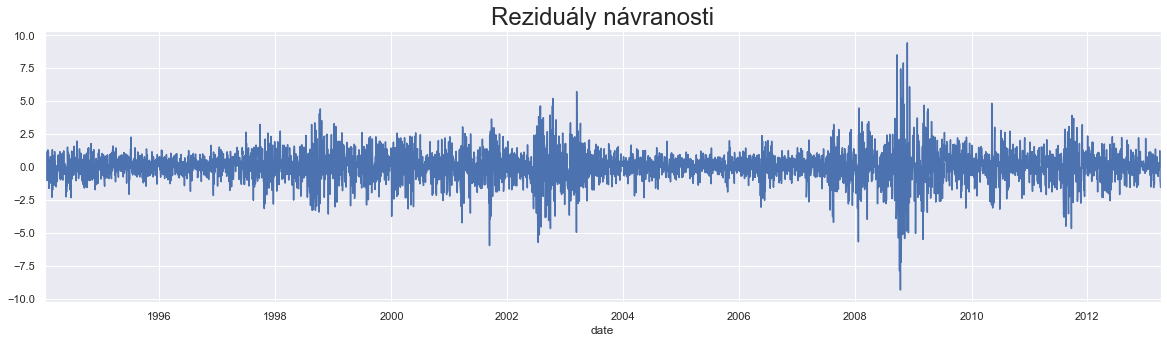

In [39]:
df.res_ret_ar_1_ma_1.plot(figsize = (20,5))
plt.title("Reziduály návranosti", size=24)
plt.show()

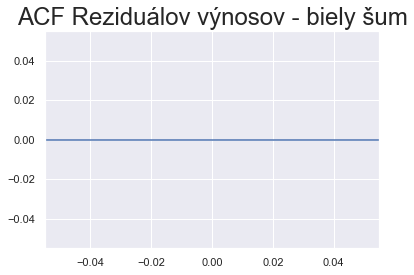

In [42]:
sgt.plot_acf(df.res_ret_ar_1_ma_1, zero = False, lags = 20)
plt.title("ACF Reziduálov výnosov - biely šum",size=24)
plt.show()

## Reevaluating Model Selection

In [25]:
model_ret_ar_5_ma_5 = ARMA(df.returns[1:], order=(5,5))
results_ret_ar_5_ma_5 = model_ret_ar_5_ma_5.fit()
results_ret_ar_5_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 5)   Log Likelihood               -7882.160
Method:                       css-mle   S.D. of innovations              1.163
Date:                Sun, 08 Sep 2019   AIC                          15788.321
Time:                        17:52:26   BIC                          15866.575
Sample:                    01-10-1994   HQIC                         15815.742
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.402      0.161      -0.008       0.045
ar.L1.returns    -0.0684      0.140     -0.490      0.624      -0.342       0.205
ar.L2.returns    -0.6722      0.146     -4.603      0.000      -0.958      -0.386
ar.L3.returns    -0.1152      0.141     -0.817      0.414      -0.392       0.161
ar.L4.returns     0.1779      0.129      1.381      0.167      -0.075       0.430
ar.L5.returns     0.1215      0.107      1.132      0.258      -0.089       0.332
ma.L1.returns     0.0443      0.138      0.322      0.748      -0.226       0.314
ma.L2.returns     0.6223      0.144      4.321      0.000       0.340       0.905
ma.L3.returns     0.0107      0.136      0.079      0.937      -0.256       0.277
ma.L4.returns    -0.1753      0.122     -1.436      0.151      -0.415       0.064
ma.L5.returns    -0.2240      0.104     -2.148      0.032      -0.428      -0.020
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0870           -1.0364j            1.0401           -0.2367
AR.2            0.0870           +1.0364j            1.0401            0.2367
AR.3            1.7715           -0.0000j            1.7715           -0.0000
AR.4           -1.7050           -1.1784j            2.0726           -0.4038
AR.5           -1.7050           +1.1784j            2.0726            0.4038
MA.1            0.1033           -1.0434j            1.0485           -0.2343
MA.2            0.1033           +1.0434j            1.0485            0.2343
MA.3            1.4855           -0.0000j            1.4855           -0.0000
MA.4           -1.2373           -1.0965j            1.6532           -0.3846
MA.5           -1.2373           +1.0965j            1.6532            0.3846
-----------------------------------------------------------------------------
"""

In [26]:
model_ret_ar_5_ma_1 = ARMA(df.returns[1:], order=(5,1))
results_ret_ar_5_ma_1 = model_ret_ar_5_ma_1.fit()
results_ret_ar_5_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 1)   Log Likelihood               -7889.311
Method:                       css-mle   S.D. of innovations              1.165
Date:                Sun, 08 Sep 2019   AIC                          15794.623
Time:                        17:52:51   BIC                          15846.792
Sample:                    01-10-1994   HQIC                         15812.903
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.407      0.159      -0.007       0.045
ar.L1.returns     0.3440      0.131      2.624      0.009       0.087       0.601
ar.L2.returns    -0.0458      0.015     -3.005      0.003      -0.076      -0.016
ar.L3.returns    -0.0652      0.016     -4.010      0.000      -0.097      -0.033
ar.L4.returns     0.0741      0.018      4.068      0.000       0.038       0.110
ar.L5.returns    -0.0813      0.014     -5.688      0.000      -0.109      -0.053
ma.L1.returns    -0.3673      0.131     -2.801      0.005      -0.624      -0.110
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6158           -0.0000j            1.6158           -0.5000
AR.2            1.3793           -0.8613j            1.6261           -0.0888
AR.3            1.3793           +0.8613j            1.6261            0.0888
AR.4           -0.1156           -1.6929j            1.6968           -0.2608
AR.5           -0.1156           +1.6929j            1.6968            0.2608
MA.1            2.7223           +0.0000j            2.7223            0.0000
-----------------------------------------------------------------------------
"""

In [27]:
model_ret_ar_1_ma_5 = ARMA(df.returns[1:], order=(1,5))
results_ret_ar_1_ma_5 = model_ret_ar_1_ma_5.fit()
results_ret_ar_1_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 5)   Log Likelihood               -7890.973
Method:                       css-mle   S.D. of innovations              1.165
Date:                Sun, 08 Sep 2019   AIC                          15797.947
Time:                        17:53:13   BIC                          15850.116
Sample:                    01-10-1994   HQIC                         15816.228
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.419      0.156      -0.007       0.045
ar.L1.returns     0.3285      0.152      2.159      0.031       0.030       0.627
ma.L1.returns    -0.3534      0.152     -2.332      0.020      -0.650      -0.056
ma.L2.returns    -0.0404      0.015     -2.624      0.009      -0.071      -0.010
ma.L3.returns    -0.0679      0.017     -4.022      0.000      -0.101      -0.035
ma.L4.returns     0.0742      0.020      3.771      0.000       0.036       0.113
ma.L5.returns    -0.0683      0.015     -4.660      0.000      -0.097      -0.040
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.0443           +0.0000j            3.0443            0.0000
MA.1           -1.1897           -1.1548j            1.6580           -0.3774
MA.2           -1.1897           +1.1548j            1.6580            0.3774
MA.3            1.5041           -0.0000j            1.5041           -0.0000
MA.4            0.9809           -1.6057j            1.8815           -0.1627
MA.5            0.9809           +1.6057j            1.8815            0.1627
-----------------------------------------------------------------------------
"""

In [28]:
print("ARMA(5,1):  \t LL = ",results_ret_ar_5_ma_1.llf,"\t AIC = ",results_ret_ar_5_ma_1.aic)
print("ARMA(1,5):  \t LL = ",results_ret_ar_1_ma_5.llf,"\t AIC = ",results_ret_ar_1_ma_5.aic)

ARMA(5,1):  	 LL =  -7889.311282945815 	 AIC =  15794.62256589163
ARMA(1,5):  	 LL =  -7890.9734602094495 	 AIC =  15797.946920418899


In [30]:
print("ARMA(3,2):  \t LL = ",results_ret_ar_3_ma_2.llf,"\t AIC = ",results_ret_ar_3_ma_2.aic)

ARMA(3,2):  	 LL =  -7895.74745851493 	 AIC =  15805.49491702986


## Residuals for the New Model

In [31]:
df['res_ret_ar_5_ma_1'] = results_ret_ar_5_ma_1.resid

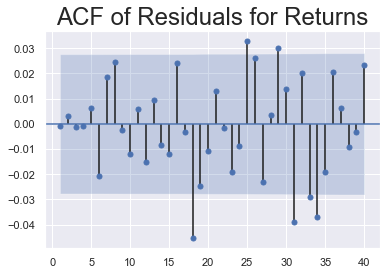

In [32]:
sgt.plot_acf(df.res_ret_ar_5_ma_1[1:], zero = False, lags = 40)
plt.title("ACF of Residuals for Returns",size=24)
plt.show()

## ARMA Model cien

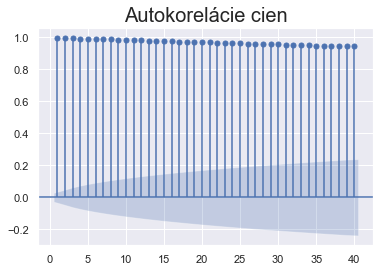

In [31]:
sgt.plot_acf(df.market_value, unbiased=True, zero = False, lags = 40)
plt.title("Autokorelácie cien",size=20)
plt.show()

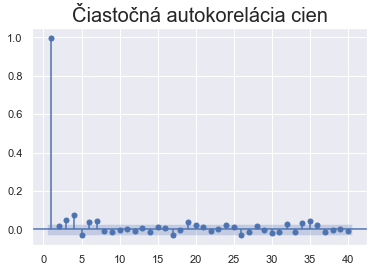

In [32]:
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("Čiastočná autokorelácia cien",size=20)
plt.show()

In [33]:
model_ar_1_ma_1 = ARMA(df.market_value, order=(1,1))
results_ar_1_ma_1 = model_ar_1_ma_1.fit()
results_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 1)   Log Likelihood              -27621.789
Method:                       css-mle   S.D. of innovations             59.248
Date:                Mon, 18 Apr 2022   AIC                          55251.579
Time:                        09:33:21   BIC                          55277.664
Sample:                    01-07-1994   HQIC                         55260.719
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    496.812     10.245      0.000    4115.907    6063.375
ar.L1.market_value     0.9985      0.001   1323.206      0.000       0.997       1.000
ma.L1.market_value    -0.0190      0.015     -1.274      0.203      -0.048       0.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
MA.1           52.5192           +0.0000j           52.5192            0.0000
-----------------------------------------------------------------------------
"""

In [34]:
df['res_ar_1_ma_1'] = results_ar_1_ma_1.resid

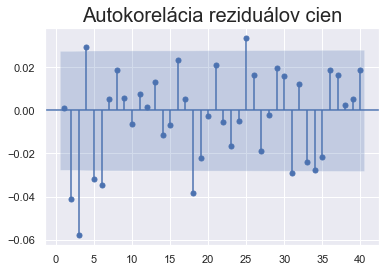

In [35]:
sgt.plot_acf(df.res_ar_1_ma_1, zero = False, lags = 40)
plt.title("Autokorelácia reziduálov cien" ,size=20)
plt.show()

In [36]:
model_ar_6_ma_6 = ARMA(df.market_value, order=(6,6))
results_ar_6_ma_6 = model_ar_6_ma_6.fit(start_ar_lags = 11)
results_ar_6_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 6)   Log Likelihood              -27587.932
Method:                       css-mle   S.D. of innovations             58.849
Date:                Mon, 18 Apr 2022   AIC                          55203.864
Time:                        09:33:42   BIC                          55295.164
Sample:                    01-07-1994   HQIC                         55235.856
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6485    568.050      8.960      0.000    3976.291    6203.006
ar.L1.market_value     1.9275      0.032     59.823      0.000       1.864       1.991
ar.L2.market_value    -1.7358      0.040    -43.308      0.000      -1.814      -1.657
ar.L3.market_value     1.2675      0.034     36.763      0.000       1.200       1.335
ar.L4.market_value    -0.2373      0.156     -1.518      0.129      -0.544       0.069
ar.L5.market_value    -0.4062      0.164     -2.484      0.013      -0.727      -0.086
ar.L6.market_value     0.1840      0.049      3.765      0.000       0.088       0.280
ma.L1.market_value    -0.9486      0.035    -27.000      0.000      -1.017      -0.880
ma.L2.market_value     0.7799      0.032     24.177      0.000       0.717       0.843
ma.L3.market_value    -0.5083      0.031    -16.307      0.000      -0.569      -0.447
ma.L4.market_value    -0.1561      0.157     -0.995      0.320      -0.464       0.152
ma.L5.market_value     0.0952      0.057      1.680      0.093      -0.016       0.206
ma.L6.market_value     0.0670      0.024      2.818      0.005       0.020       0.114
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0857           -1.0502j            1.0537           -0.2370
AR.2            0.0857           +1.0502j            1.0537            0.2370
AR.3           -2.0254           -0.0000j            2.0254           -0.5000
AR.4            1.0011           -0.0000j            1.0011           -0.0000
AR.5            1.5304           -0.2679j            1.5537           -0.0276
AR.6            1.5304           +0.2679j            1.5537            0.0276
MA.1            0.1028           -1.0612j            1.0662           -0.2346
MA.2            0.1028           +1.0612j            1.0662            0.2346
MA.3            1.3622           -0.2799j            1.3907           -0.0323
MA.4            1.3622           +0.2799j            1.3907            0.0323
MA.5           -2.1759           -1.4336j            2.6057           -0.4073
MA.6           -2.1759           +1.4336j            2.6057            0.4073
-----------------------------------------------------------------------------
"""

In [37]:
model_ar_5_ma_6 = ARMA(df.market_value, order=(5,6))
results_ar_5_ma_6 = model_ar_5_ma_6.fit(start_ar_lags = 7)
results_ar_5_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 6)   Log Likelihood              -27587.863
Method:                       css-mle   S.D. of innovations             58.849
Date:                Mon, 18 Apr 2022   AIC                          55201.726
Time:                        09:33:48   BIC                          55286.504
Sample:                    01-07-1994   HQIC                         55231.433
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6483    580.767      8.764      0.000    3951.365    6227.932
ar.L1.market_value     1.3584      0.178      7.652      0.000       1.010       1.706
ar.L2.market_value    -1.1290      0.237     -4.761      0.000      -1.594      -0.664
ar.L3.market_value     0.9148      0.229      4.001      0.000       0.467       1.363
ar.L4.market_value     0.0159      0.204      0.078      0.938      -0.383       0.415
ar.L5.market_value    -0.1612      0.119     -1.352      0.176      -0.395       0.073
ma.L1.market_value    -0.3796      0.178     -2.132      0.033      -0.728      -0.031
ma.L2.market_value     0.7294      0.125      5.830      0.000       0.484       0.975
ma.L3.market_value    -0.2198      0.153     -1.437      0.151      -0.519       0.080
ma.L4.market_value    -0.1387      0.114     -1.215      0.224      -0.362       0.085
ma.L5.market_value    -0.0879      0.017     -5.325      0.000      -0.120      -0.056
ma.L6.market_value     0.0265      0.024      1.128      0.259      -0.020       0.073
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0917           -1.0418j            1.0458           -0.2360
AR.2            0.0917           +1.0418j            1.0458            0.2360
AR.3            1.0010           -0.0000j            1.0010           -0.0000
AR.4            1.8981           -0.0000j            1.8981           -0.0000
AR.5           -2.9842           -0.0000j            2.9842           -0.5000
MA.1            0.1071           -1.0487j            1.0542           -0.2338
MA.2            0.1071           +1.0487j            1.0542            0.2338
MA.3           -1.5353           -1.5157j            2.1574           -0.3760
MA.4           -1.5353           +1.5157j            2.1574            0.3760
MA.5            1.5919           -0.0000j            1.5919           -0.0000
MA.6            4.5783           -0.0000j            4.5783           -0.0000
-----------------------------------------------------------------------------
"""

In [38]:
model_ar_6_ma_1 = ARMA(df.market_value, order=(6,1))
results_ar_6_ma_1 = model_ar_6_ma_1.fit(start_ar_lags = 7)
results_ar_6_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 1)   Log Likelihood              -27594.195
Method:                       css-mle   S.D. of innovations             58.923
Date:                Mon, 18 Apr 2022   AIC                          55206.389
Time:                        09:33:51   BIC                          55265.082
Sample:                    01-07-1994   HQIC                         55226.956
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6419    586.519      8.678      0.000    3940.085    6239.198
ar.L1.market_value     1.3921      0.058     23.930      0.000       1.278       1.506
ar.L2.market_value    -0.4369      0.059     -7.400      0.000      -0.553      -0.321
ar.L3.market_value    -0.0101      0.025     -0.409      0.683      -0.059       0.038
ar.L4.market_value     0.1126      0.025      4.527      0.000       0.064       0.161
ar.L5.market_value    -0.1158      0.025     -4.717      0.000      -0.164      -0.068
ar.L6.market_value     0.0573      0.014      4.067      0.000       0.030       0.085
ma.L1.market_value    -0.4126      0.060     -6.925      0.000      -0.529      -0.296
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0010           -0.0000j            1.0010           -0.0000
AR.2           -1.7608           -0.0000j            1.7608           -0.5000
AR.3           -0.0803           -1.8407j            1.8425           -0.2569
AR.4           -0.0803           +1.8407j            1.8425            0.2569
AR.5            1.4694           -0.8691j            1.7072           -0.0850
AR.6            1.4694           +0.8691j            1.7072            0.0850
MA.1            2.4234           +0.0000j            2.4234            0.0000
-----------------------------------------------------------------------------
"""

In [40]:
print("ARMA(6,6):  \t LL = ", results_ar_6_ma_6.llf, "\t AIC = ", results_ar_6_ma_6.aic)
print("ARMA(5,6):  \t LL = ", results_ar_5_ma_6.llf, "\t AIC = ", results_ar_5_ma_6.aic)
print("ARMA(6,1):  \t LL = ", results_ar_6_ma_1.llf, "\t AIC = ", results_ar_6_ma_1.aic)

ARMA(6,6):  	 LL =  -27587.932076938352 	 AIC =  55203.864153876704
ARMA(5,6):  	 LL =  -27587.862948816197 	 AIC =  55201.725897632394
ARMA(6,1):  	 LL =  -27594.19457096214 	 AIC =  55206.38914192428


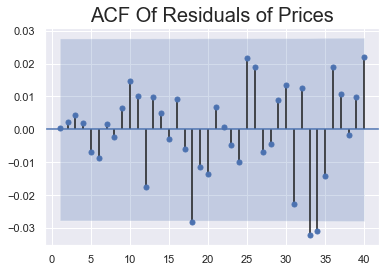

In [44]:
df['res_ar_5_ma_6'] = results_ar_5_ma_6.resid
sgt.plot_acf(df.res_ar_5_ma_6, zero = False, lags = 40)
plt.title("ACF Of Residuals of Prices",size=20)
plt.show()

## ARMA for Returns vs ARMA for Prices

In [45]:
print("ARMA(5,6):  \t LL = ", results_ar_5_ma_6.llf, "\t AIC = ", results_ar_5_ma_6.aic)
print("ARMA(5,1):  \t LL = ", results_ret_ar_5_ma_1.llf, "\t AIC = ", results_ret_ar_5_ma_1.aic)

ARMA(5,6):  	 LL =  -27587.862948301117 	 AIC =  55201.725896602235
ARMA(5,1):  	 LL =  -7889.311282945815 	 AIC =  15794.62256589163
